<a href="https://colab.research.google.com/github/SanePai/Neural_Networks-Assignment-1/blob/master/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINI BATCH**

In [ ]:
%cd "/content/drive/My Drive/NNFL"
!ls
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

/content/drive/My Drive/NNFL
data2.xlsx  test_feature_matrix.xlsx	  training_output.xlsx
data3.xlsx  test_output.xlsx
data4.xlsx  training_feature_matrix.xlsx


In [ ]:
X1 = pd.read_excel("training_feature_matrix.xlsx", header=None)
Y1 = pd.read_excel("training_output.xlsx",header=None)
Y_mean = Y1.mean()
Y_std = Y1.std()
#Normalization
X1 = (X1 - X1.mean())/X1.std()
Y1 = (Y1-Y1.mean())/Y1.std()
X1 = np.array(X1)
Y1 = np.array(Y1)
m = len(X1) #Number of instances
col = np.ones((m,1)) 
X1 = np.concatenate((col,X1),axis=1)

In [ ]:
X = X1.copy()
Y = Y1.copy()
k = 1000 #Iterations
alpha = 0.0001 #Learning Rate
W_list = np.ones((k,3))
J_list = np.ones(k)
MSE_list = np.ones(k)

In [ ]:
def hypothesis(w,X,m):
  '''Returns the hypothesis as a list for given weights'''
  h = []
  for i in range(0,m):
    h.append(w[0] + w[1]*X[i][1] + w[2]*X[i][2])
  return h

def update(w,alpha,m,X,Y,h):
  '''Updates the weights'''
  d0 = 0
  d1 = 0
  d2 = 0
  for i in range(0,m):
    d0 = d0 + ((h[i] - Y[i])*X[i][0])
  for i in range(0,m):
    d1 = d1 + ((h[i] - Y[i])*X[i][1])
  for i in range(0,m):
    d2 = d2 + ((h[i] - Y[i])*X[i][2])
  

  t0 = w[0] - alpha*d0
  t1 = w[1] - alpha*d1
  t2 = w[2] - alpha*d2
  
  w[0]=t0
  w[1]=t1
  w[2]=t2
  return w

def cost(h,y,m):
  #Calculate Cost
  j = 0
  for i in range(0,m):
    j = j + 0.5*(h[i]-y[i])**2
  return j  

def denormalize(data,avg,vari):
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

def calc_mse(m, h, y):
  add = 0
  for i in range(0,m):
    add = add + (h[i] - y[i])**2
  err = add/m  
  return err


In [ ]:
m_star = 20 #Batch size(m*)
w = np.random.rand(3)
for i in range(0,k):
  np.random.shuffle(X)
  h = hypothesis(w,X,m)
  w = update(w, alpha, m_star, X, Y,h)
  W_list[i][0] = w[0]
  W_list[i][1] = w[1]
  W_list[i][2] = w[2]
  MSE_list[i] = (calc_mse(m_star,denormalize(h,Y_mean,Y_std),denormalize(Y,Y_mean,Y_std)))
  J_list[i] = cost(h,Y,m)

Text(0, 0.5, 'Cost')

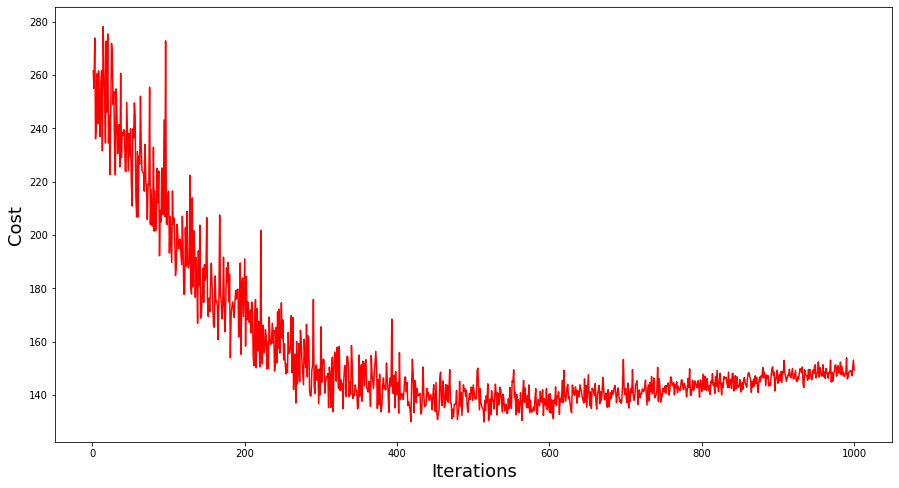

In [ ]:
plt.figure(figsize=(15,8))
g = plt.axes()
g.plot(range(1,k+1), J_list, 'red')
g.set_xlabel("Iterations", fontsize = 18)
g.set_ylabel("Cost", fontsize = 18)

In [ ]:
print(MSE_list[-1])

6.19242855234923


Text(0.5, 0.92, 'Cost vs weights')

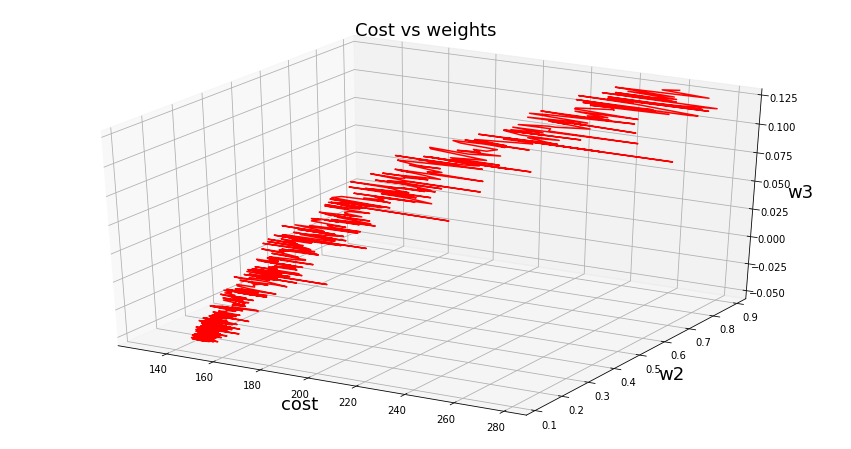

In [ ]:
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D(J_list, W_list[:,1], W_list[:,2], 'red')
gr.set_xlabel("cost", fontsize = 18)
gr.set_ylabel("w2", fontsize = 18)
gr.set_zlabel("w3", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

In [ ]:
# print(W_list)

In [ ]:
#Using the hypothesis on the given test data
X1_test = pd.read_excel("test_feature_matrix.xlsx", header = None)
Y1_test = pd.read_excel("test_output.xlsx", header = None)
#Normalize
X1_test = (X1_test-X1_test.mean())/X1_test.std()
X1_test = np.array(X1_test)
Y1_test = np.array(Y1_test)
m_test = len(X1_test)
av = Y1_test.mean()
va = Y1_test.std()
col = np.ones((m_test,1)) 
X1_test = np.concatenate((col,X1_test),axis=1)
X_test = X1_test.copy()
Y_test = Y1_test.copy()

In [ ]:
h_test = hypothesis(w,X_test,m_test)
mse = calc_mse(m_test,denormalize(h_test,av,va),Y_test)
print("MSE(Test data): ", mse)
print("Final Weights:", w)

MSE(Test data):  [3.38372348]
Final Weights: [-0.4608492   0.12369965 -0.04732558]


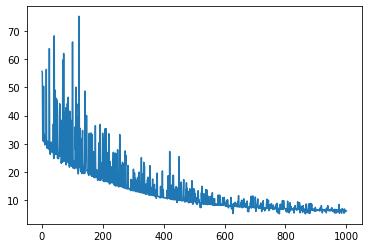

In [ ]:
plt.plot(range(1,k+1), MSE_list)

**STOCHASTIC**

In [ ]:
X1 = pd.read_excel("training_feature_matrix.xlsx", header=None)
Y1 = pd.read_excel("training_output.xlsx",header=None)
Y_mean = Y1.mean()
Y_std = Y1.std()
#Normalization
X1 = (X1 - X1.mean())/X1.std()
Y1 = (Y1-Y1.mean())/Y1.std()
X1 = np.array(X1)
Y1 = np.array(Y1)
m = len(X1) #Number of instances
col = np.ones((m,1)) 
X1 = np.concatenate((col,X1),axis=1)

In [ ]:
X = X1.copy()
Y = Y1.copy()
k = 1000 #Iterations
alpha = 0.0001 #Learning Rate
W_list = np.ones((k,3))
J_list = np.ones(k)
MSE_list = np.ones(k)

In [ ]:
def hypothesis(w,X,m):
  '''Returns the hypothesis as a list for given weights'''
  h = []
  for i in range(0,m):
    h.append(w[0] + w[1]*X[i][1] + w[2]*X[i][2])
  return h

def update(w,alpha,m,X,Y,h,i):
  '''Updates the weights'''
  for n in range(0,3):
    w[n] = w[n] - alpha*((h[i]-Y[i])*X[i][n])
  return w

def cost(h,y,m):
  #Calculate Cost
  j = 0
  for i in range(0,m):
    j = j + 0.5*(h[i]-y[i])**2
  return j  

def denormalize(data,avg,vari):
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

def calc_mse(m, h, y):
  add = 0
  for i in range(0,m):
    add = add + (h[i] - y[i])**2
  err = add/m  
  return err


In [ ]:
w = np.random.rand(3)
print(w)
for i in range(k):
  index = np.random.randint(0,m)
  h = hypothesis(w,X,m)
  w = update(w,alpha,m,X,Y,h,index)
  # print(w)
  W_list[i][0] = w[0]
  W_list[i][1] = w[1]
  W_list[i][2] = w[2]
  J_list[i] = cost(h,Y,m)
  # print(i, h[0], J_list[i])
  MSE_list[i] = (calc_mse(m,denormalize(h,Y_mean,Y_std),denormalize(Y,Y_mean,Y_std)))

print(J_list[-1])
print(w)



[0.23885389 0.63293294 0.2339579 ]
0 0.35953400238512023 161.39003880635505
1 0.3594841384377053 161.38839580165015
2 0.3593332391280963 161.38011299740876
3 0.35925610922770546 161.3726684371744
4 0.35919549394446193 161.36734317754028
5 0.35938701705867404 161.38311251537147
6 0.3593207016410328 161.37777307310512
7 0.35938087544515507 161.38392035719437
8 0.3593023432210173 161.38072478071854
9 0.35932949491247257 161.3837645279793
10 0.3592718326098494 161.3803655045323
11 0.359248281223032 161.37895113728797
12 0.3591710265275243 161.37781354637437
13 0.3591827543321339 161.37858271780448
14 0.3590643756169405 161.37019791741076
15 0.35915665514672224 161.3784653877154
16 0.3591683871352691 161.37923471070627
17 0.3589218465408298 161.35235369052734
18 0.3591133956443243 161.3681144754423
19 0.3590165311194664 161.35985838080043
20 0.3589693098673402 161.35795734009258
21 0.3589187050462141 161.35416083186377
22 0.3589550620116601 161.35663254447738
23 0.3588641204828954 161.34747

In [ ]:
print(MSE_list[-1]) #Training Error

20.084871796084016


Text(0, 0.5, 'Cost')

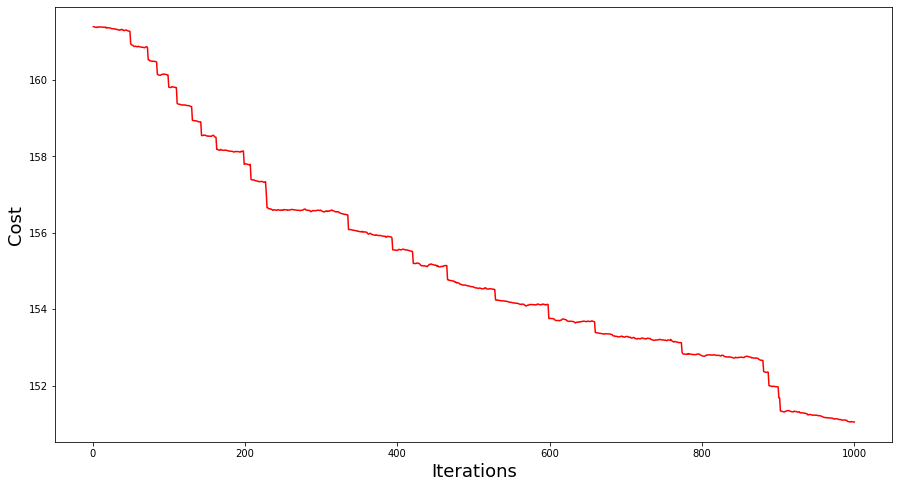

In [ ]:
plt.figure(figsize=(15,8))
g = plt.axes()
g.plot(range(1,k+1), J_list, 'red')
g.set_xlabel("Iterations", fontsize = 18)
g.set_ylabel("Cost", fontsize = 18)

Text(0.5, 0.92, 'Cost vs weights')

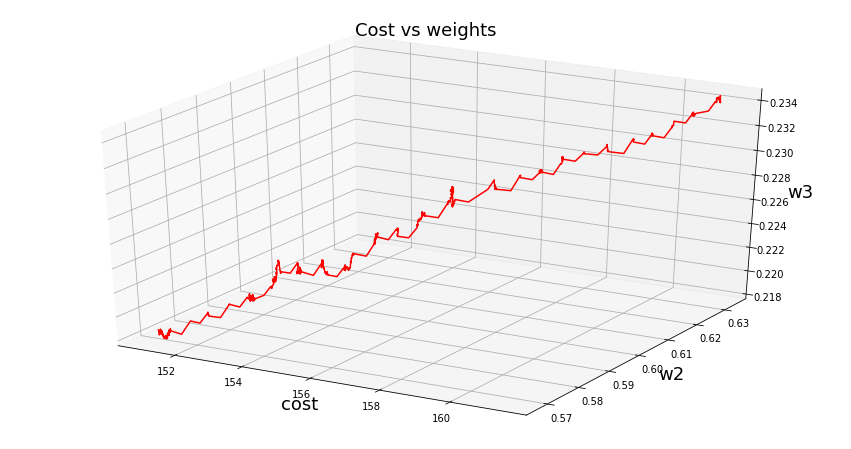

In [ ]:
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D(J_list, W_list[:,1], W_list[:,2], 'red')
gr.set_xlabel("cost", fontsize = 18)
gr.set_ylabel("w2", fontsize = 18)
gr.set_zlabel("w3", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

In [ ]:
#Using the hypothesis on the given test data
X1_test = pd.read_excel("test_feature_matrix.xlsx", header = None)
Y1_test = pd.read_excel("test_output.xlsx", header = None)
#Normalize
X1_test = (X1_test-X1_test.mean())/X1_test.std()
X1_test = np.array(X1_test)
Y1_test = np.array(Y1_test)
m_test = len(X1_test)
av = Y1_test.mean()
va = Y1_test.std()
col = np.ones((m_test,1)) 
X1_test = np.concatenate((col,X1_test),axis=1)
X_test = X1_test.copy()
Y_test = Y1_test.copy()

In [ ]:
h_test = hypothesis(w,X_test,m_test)
mse = calc_mse(m_test,denormalize(h_test,av,va),Y_test)
print("MSE(Test data): ", mse)
print("Final Weights:", w)

MSE(Test data):  [3.82440275]
Final Weights: [0.21679727 0.56811581 0.21867752]
